In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# <p  style="text-align:center;"> **PULLING THE HISTORICAL DATA** </p>

In [2]:
df_algorithm = pd.read_csv("algorithm_historical_progrssion.csv")

df_algorithm.drop("epoca", axis = 1, inplace = True)

# <p  style="text-align:center;"> **CORRELATION** </p>

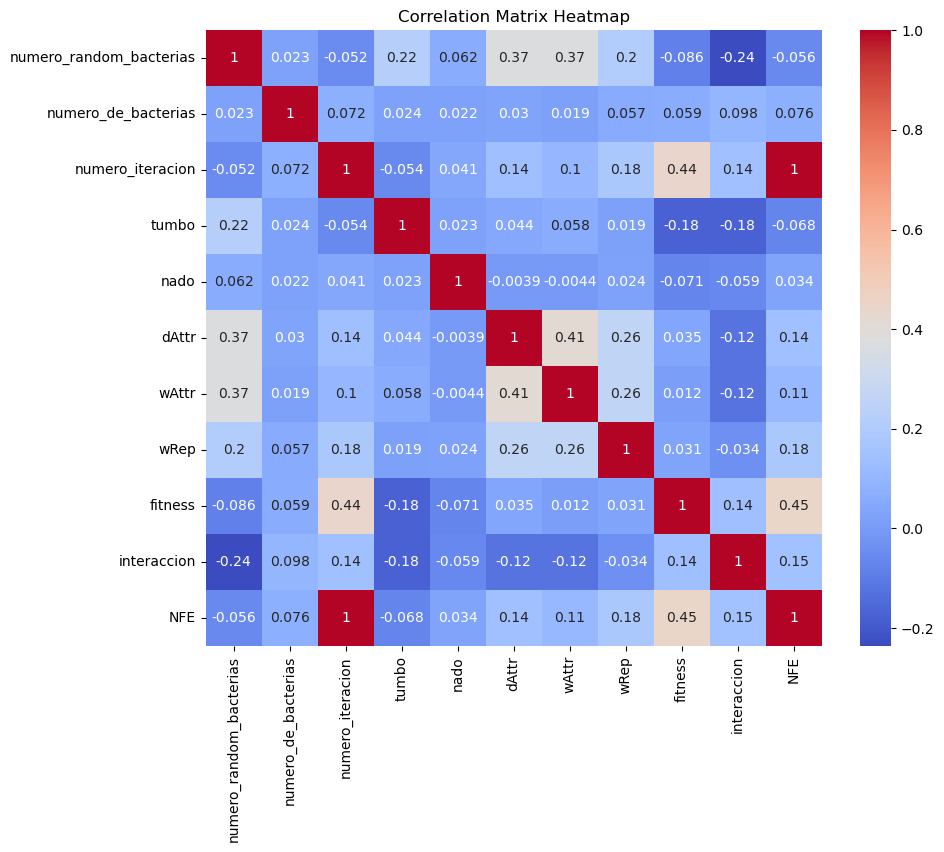

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_algorithm.corr(), annot=True, cmap='coolwarm', cbar=True, square=True)

plt.title("Correlation Matrix Heatmap")
plt.savefig("1.jpg", format='jpg', dpi=300)  # Save as JPG with high resolution

# Show the plot
plt.show()

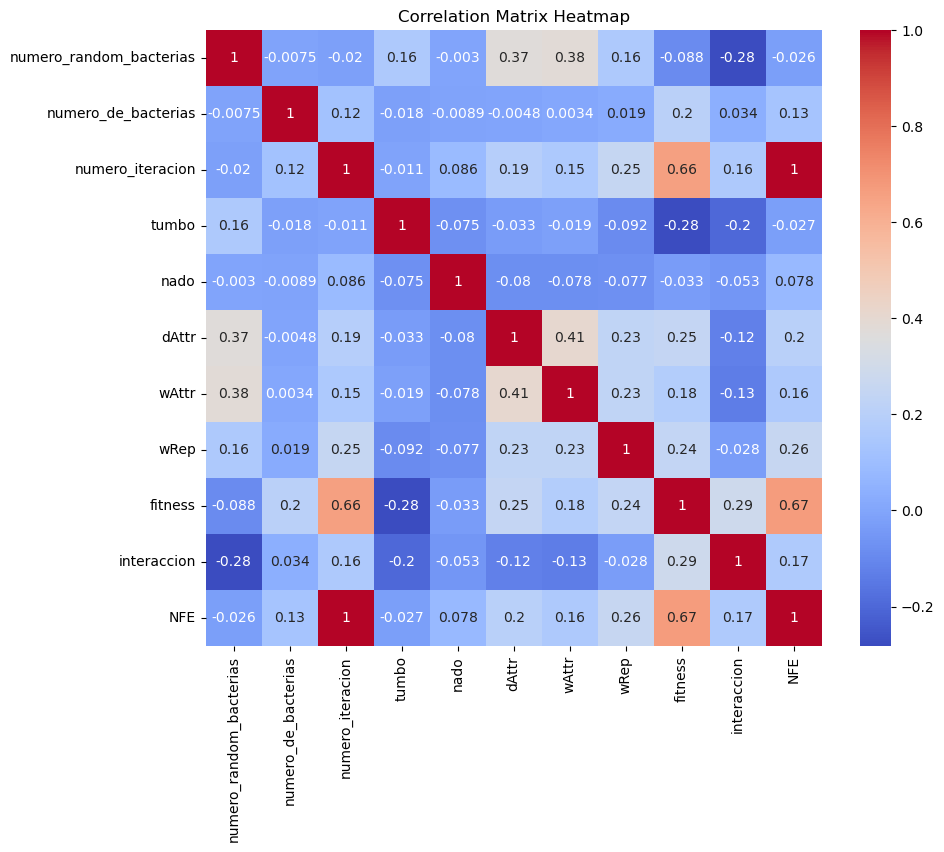

In [4]:
df_algorithm_filtred = df_algorithm[df_algorithm["fitness"] >= 9000 ]

plt.figure(figsize=(10, 8)) 
sns.heatmap(df_algorithm_filtred.corr(), annot=True, cmap='coolwarm', cbar=True, square=True)

plt.title("Correlation Matrix Heatmap")
plt.show()

# <p  style="text-align:center;"> **COLUMNS DISTRIBUTION** </p>

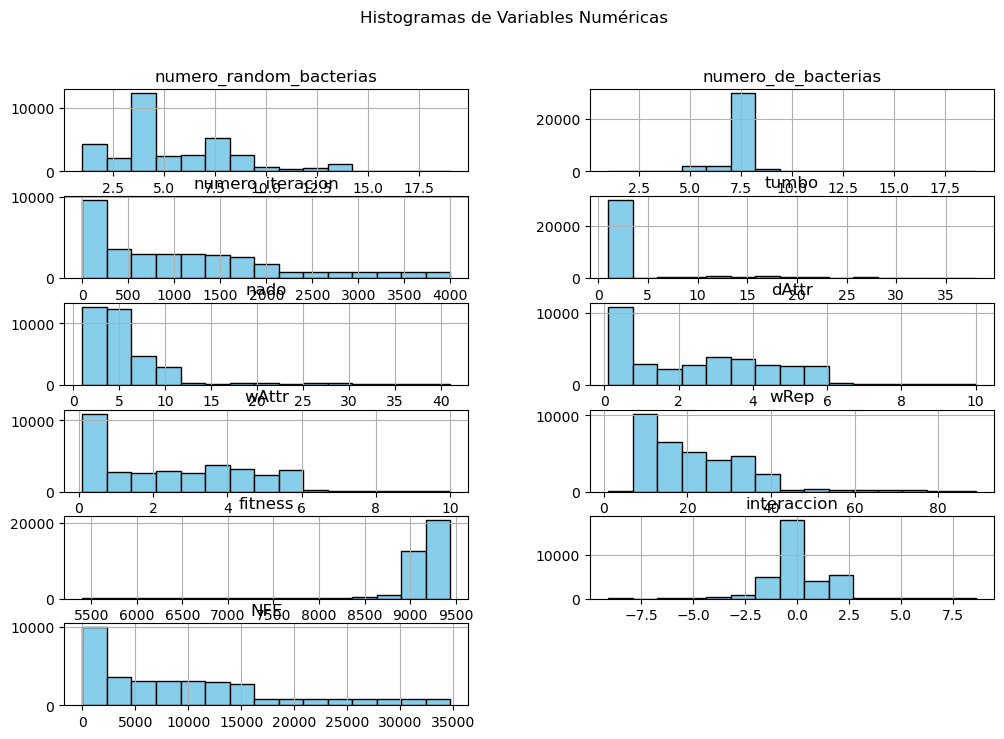

In [5]:
num_columns = len(df_algorithm.columns)
rows = math.ceil(num_columns / 2)
cols = 2 

df_algorithm.hist(bins=15, figsize=(12, 8), layout=(rows, cols), color='skyblue', edgecolor='black')
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

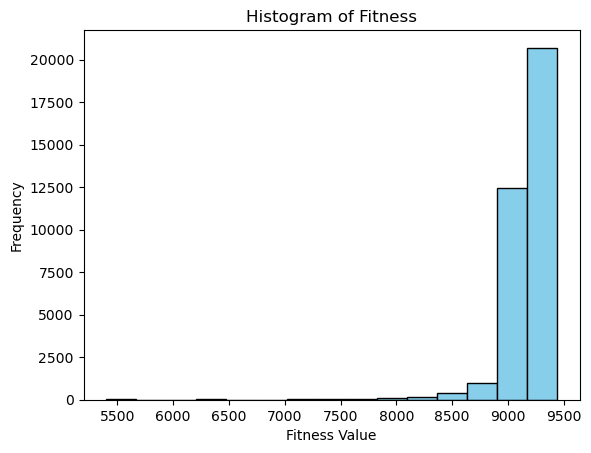

In [6]:
plt.hist(df_algorithm["fitness"], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Fitness')
plt.xlabel('Fitness Value')
plt.ylabel('Frequency')
plt.show()

# <p  style="text-align:center;"> **FITNESS PROGRESSION** </p>

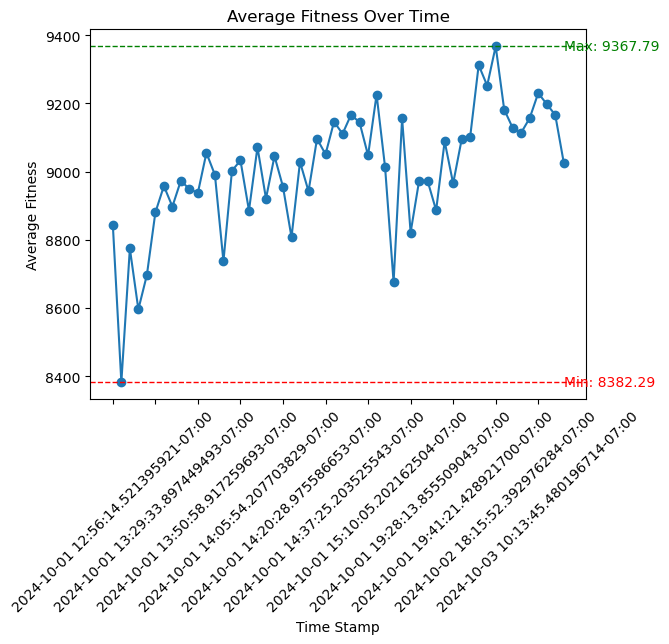

In [7]:
df = df_algorithm.groupby("time_stamp")["fitness"].mean().reset_index()

plt.plot(df["time_stamp"], df["fitness"], marker='o', linestyle='-')

n = 5  
plt.xticks(df["time_stamp"][::n], rotation=45)

max_fitness = df["fitness"].max()
min_fitness = df["fitness"].min()

plt.axhline(max_fitness, color='green', linestyle='--', linewidth=1)
plt.axhline(min_fitness, color='red', linestyle='--', linewidth=1)


plt.text(df["time_stamp"].iloc[-1], max_fitness, f'Max: {max_fitness:.2f}', color='green', va='center')
plt.text(df["time_stamp"].iloc[-1], min_fitness, f'Min: {min_fitness:.2f}', color='red', va='center')

plt.xlabel("Time Stamp")
plt.ylabel("Average Fitness")
plt.title("Average Fitness Over Time")

plt.show()


# <p  style="text-align:center;"> **DATA ANALYISIS** </p>

In [8]:
df_best_fitness = df_algorithm[df_algorithm["time_stamp"] == (df[df["fitness"] == df["fitness"].max()]["time_stamp"].values[0])]

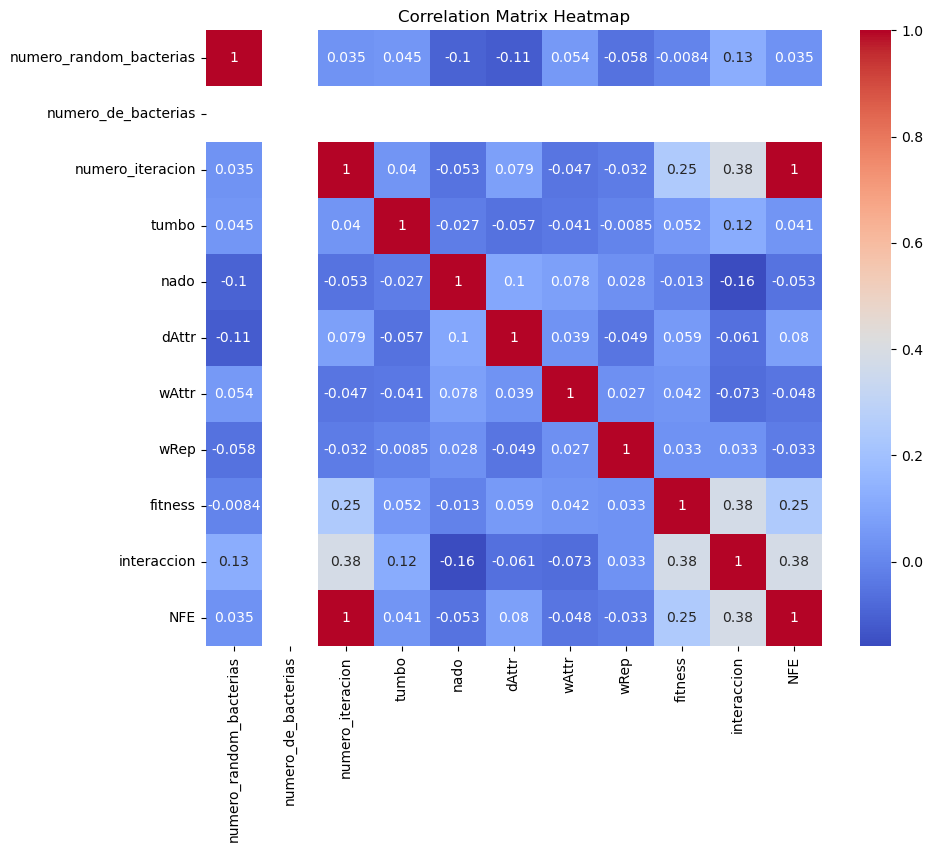

In [9]:
df_best_fitness

plt.figure(figsize=(10, 8))
sns.heatmap(df_best_fitness.corr(), annot=True, cmap='coolwarm', cbar=True, square=True)

plt.title("Correlation Matrix Heatmap")
plt.show()



# <p  style="text-align:center;"> **TOP FITNESS PARAMTERS** </p>

In [10]:
df_top_fitness_parameters = (df_algorithm[df_algorithm["fitness"] >= 9100][["numero_random_bacterias" , "numero_de_bacterias" , "tumbo" , "nado" , "dAttr" , "wAttr" , "wRep" , "fitness"]]).drop_duplicates()
df_top_fitness_parameters = df_top_fitness_parameters.sort_values(by = ["fitness"])

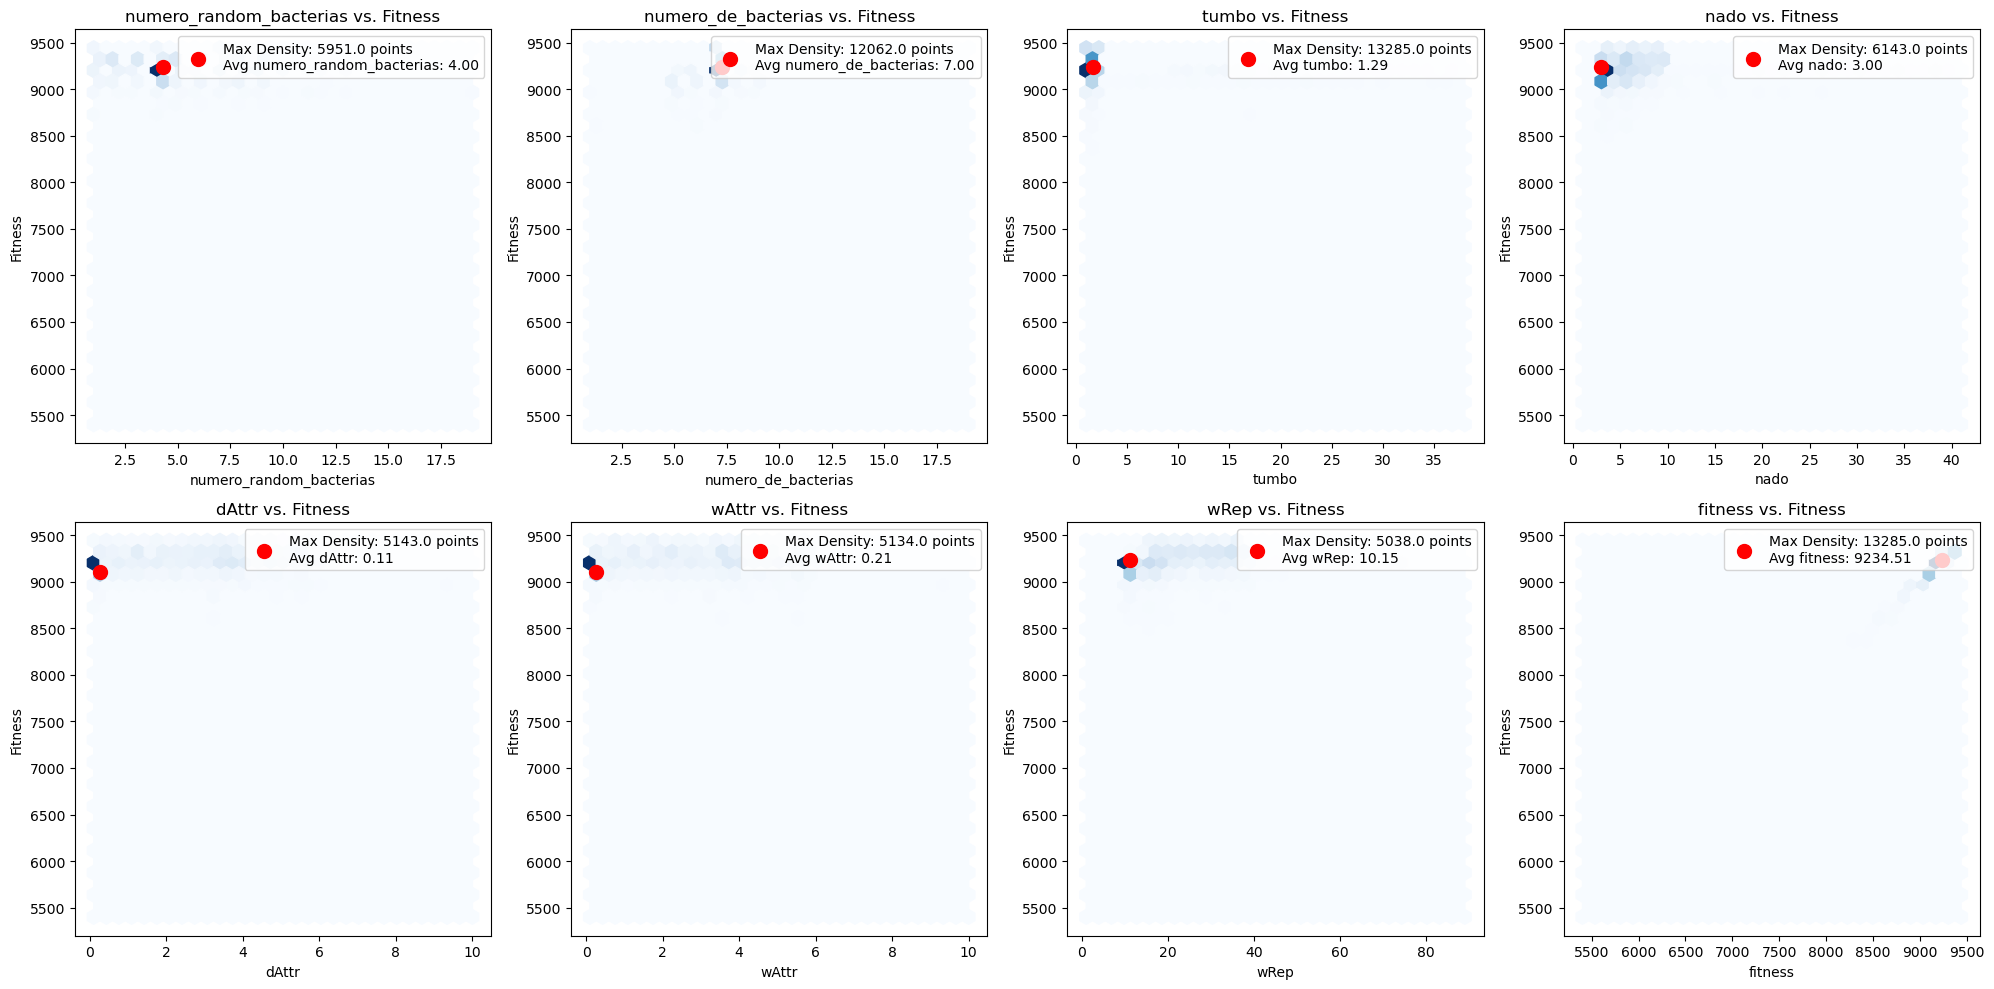

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# List of columns to plot against 'fitness'
columns_to_plot = ["numero_random_bacterias", "numero_de_bacterias", "tumbo", "nado", "dAttr", "wAttr", "wRep", "fitness"]

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

# Plot hexbin charts for each column against 'fitness'
for i, col in enumerate(columns_to_plot):
    # Create hexbin plot
    hb = axes[i].hexbin(df_algorithm[col], df_algorithm["fitness"], gridsize=30, cmap='Blues')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Fitness")
    axes[i].set_title(f"{col} vs. Fitness")

    # Calculate the most colored (densely populated) pixel
    counts, xedges, yedges = np.histogram2d(df_algorithm[col], df_algorithm["fitness"], bins=30)
    max_bin_idx = np.unravel_index(np.argmax(counts), counts.shape)

    # Get the coordinates of the most dense bin
    x_center = (xedges[max_bin_idx[0]] + xedges[max_bin_idx[0] + 1]) / 2
    y_center = (yedges[max_bin_idx[1]] + yedges[max_bin_idx[1] + 1]) / 2

    # Filter the points within the max density cell
    mask = (
        (df_algorithm[col] >= xedges[max_bin_idx[0]]) & 
        (df_algorithm[col] < xedges[max_bin_idx[0] + 1]) & 
        (df_algorithm["fitness"] >= yedges[max_bin_idx[1]]) & 
        (df_algorithm["fitness"] < yedges[max_bin_idx[1] + 1])
    )

    # Calculate the average fitness value within the max density bin
    avg_fitness = df_algorithm.loc[mask, col].mean()

    # Highlight the most dense bin with a red point and label
    axes[i].scatter(x_center, y_center, color='red', s=100, label=f"Max Density: {counts[max_bin_idx]} points\nAvg {col}: {avg_fitness:.2f}")
    axes[i].legend(loc='upper right')

# Hide any unused subplots (if any)
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])  # Remove extra subplots

# Adjust layout and show the final plot
plt.tight_layout()
plt.show()


# <p  style="text-align:center;"> **Fitness by interaccion** </p>

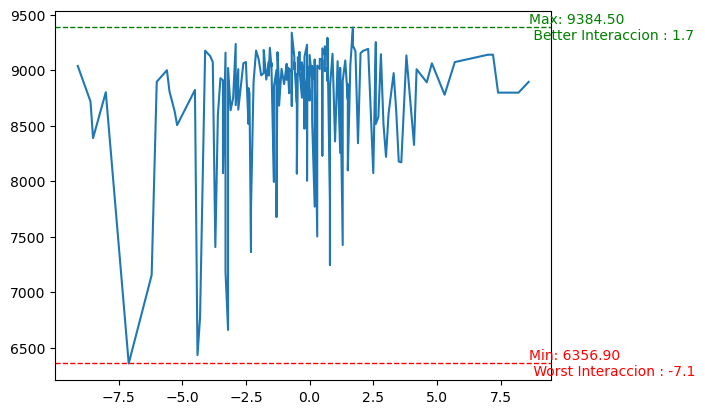

In [12]:
df_interaccion = df_algorithm.groupby("interaccion")["fitness"].mean().reset_index()

max_fitness = df_interaccion["fitness"].max()
better_interaccion = df_interaccion[df_interaccion["fitness"] == max_fitness]["interaccion"].values[0]
min_fitness = df_interaccion["fitness"].min()
worst_interaccion = df_interaccion[df_interaccion["fitness"] == min_fitness]["interaccion"].values[0]

plt.axhline(max_fitness, color='green', linestyle='--', linewidth=1)
plt.axhline(min_fitness, color='red', linestyle='--', linewidth=1)

plt.text(df_interaccion["interaccion"].iloc[-1], max_fitness, f'Max: {max_fitness:.2f} \n Better Interaccion : {better_interaccion}', color='green', va='center')
plt.text(df_interaccion["interaccion"].iloc[-1], min_fitness, f'Min: {min_fitness:.2f} \n Worst Interaccion : {worst_interaccion}', color='red', va='center')

plt.plot(df_interaccion["interaccion"] , df_interaccion["fitness"] )

# <p  style="text-align:center;"> **Fitness by tumbo** </p>

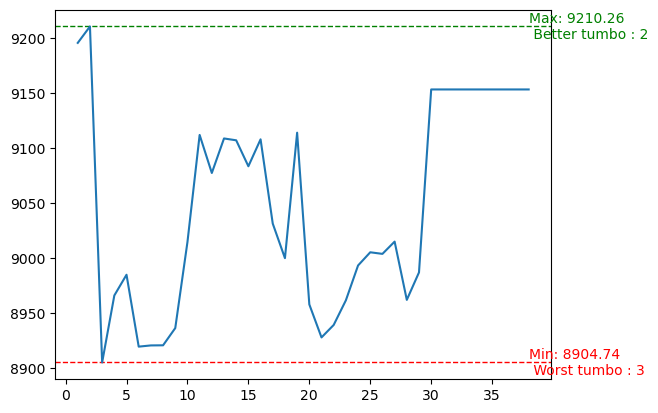

In [13]:
df_tumbo = df_algorithm.groupby("tumbo")["fitness"].mean().reset_index()

max_fitness = df_tumbo["fitness"].max()
better_tumbo = df_tumbo[df_tumbo["fitness"] == max_fitness]["tumbo"].values[0]
min_fitness = df_tumbo["fitness"].min()
worst_tumbo = df_tumbo[df_tumbo["fitness"] == min_fitness]["tumbo"].values[0]

plt.axhline(max_fitness, color='green', linestyle='--', linewidth=1)
plt.axhline(min_fitness, color='red', linestyle='--', linewidth=1)

plt.text(df_tumbo["tumbo"].iloc[-1], max_fitness, f'Max: {max_fitness:.2f} \n Better tumbo : {better_tumbo}', color='green', va='center')
plt.text(df_tumbo["tumbo"].iloc[-1], min_fitness, f'Min: {min_fitness:.2f} \n Worst tumbo : {worst_tumbo}', color='red', va='center')

plt.plot(df_tumbo["tumbo"] , df_tumbo["fitness"] )

# <p  style="text-align:center;"> **Fitness by wAttr** </p>

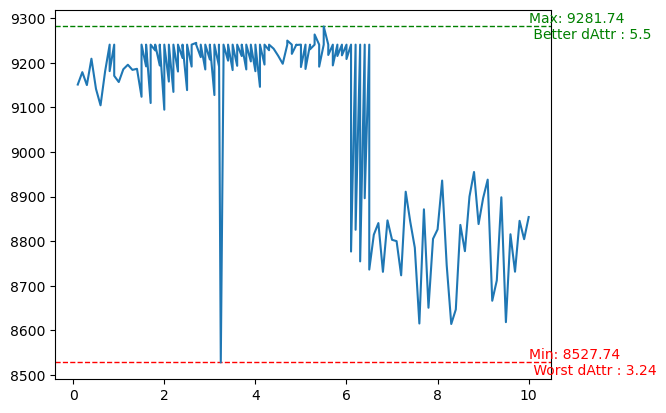

In [14]:
df_dAttr = df_algorithm.groupby("dAttr")["fitness"].mean().reset_index()

max_fitness = df_dAttr["fitness"].max()
better_dAttr = df_dAttr[df_dAttr["fitness"] == max_fitness]["dAttr"].values[0]
min_fitness = df_dAttr["fitness"].min()
worst_dAttr = df_dAttr[df_dAttr["fitness"] == min_fitness]["dAttr"].values[0]

plt.axhline(max_fitness, color='green', linestyle='--', linewidth=1)
plt.axhline(min_fitness, color='red', linestyle='--', linewidth=1)

plt.text(df_dAttr["dAttr"].iloc[-1], max_fitness, f'Max: {max_fitness:.2f} \n Better dAttr : {better_dAttr}', color='green', va='center')
plt.text(df_dAttr["dAttr"].iloc[-1], min_fitness, f'Min: {min_fitness:.2f} \n Worst dAttr : {worst_dAttr}', color='red', va='center')

plt.plot(df_dAttr["dAttr"] , df_dAttr["fitness"] )

# <p  style="text-align:center;"> **Fitness by wRep** </p>

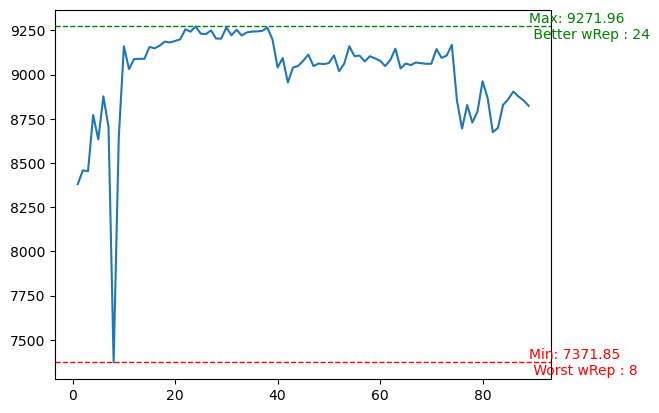

In [15]:
df_wRep = df_algorithm.groupby("wRep")["fitness"].mean().reset_index()

max_fitness = df_wRep["fitness"].max()
better_wRep = df_wRep[df_wRep["fitness"] == max_fitness]["wRep"].values[0]
min_fitness = df_wRep["fitness"].min()
worst_wRep = df_wRep[df_wRep["fitness"] == min_fitness]["wRep"].values[0]

plt.axhline(max_fitness, color='green', linestyle='--', linewidth=1)
plt.axhline(min_fitness, color='red', linestyle='--', linewidth=1)

plt.text(df_wRep["wRep"].iloc[-1], max_fitness, f'Max: {max_fitness:.2f} \n Better wRep : {better_wRep}', color='green', va='center')
plt.text(df_wRep["wRep"].iloc[-1], min_fitness, f'Min: {min_fitness:.2f} \n Worst wRep : {worst_wRep}', color='red', va='center')

plt.plot(df_wRep["wRep"] , df_wRep["fitness"] )

# <p  style="text-align:center;"> **Fitness by numero_random_bacterias** </p>

In [16]:
df_algorithm.columns

Index(['time_stamp', 'numero_random_bacterias', 'numero_de_bacterias',
       'numero_iteracion', 'tumbo', 'nado', 'dAttr', 'wAttr', 'wRep',
       'fitness', 'interaccion', 'NFE'],
      dtype='object')

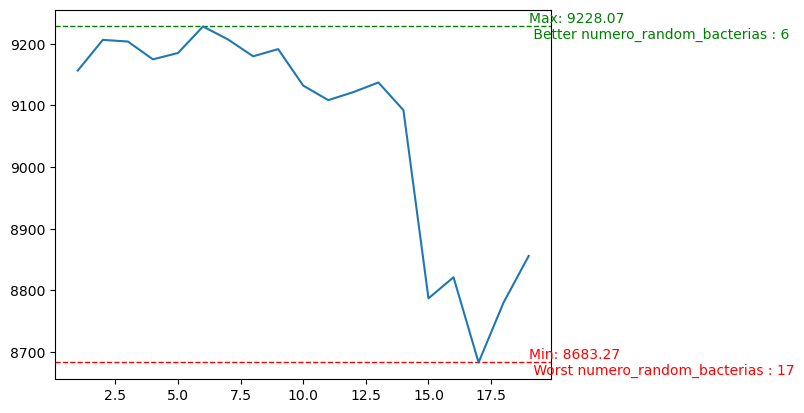

In [17]:
df_numero_random_bacterias = df_algorithm.groupby("numero_random_bacterias")["fitness"].mean().reset_index()

max_fitness = df_numero_random_bacterias["fitness"].max()
better_numero_random_bacterias = df_numero_random_bacterias[df_numero_random_bacterias["fitness"] == max_fitness]["numero_random_bacterias"].values[0]
min_fitness = df_numero_random_bacterias["fitness"].min()
worst_numero_random_bacterias = df_numero_random_bacterias[df_numero_random_bacterias["fitness"] == min_fitness]["numero_random_bacterias"].values[0]

plt.axhline(max_fitness, color='green', linestyle='--', linewidth=1)
plt.axhline(min_fitness, color='red', linestyle='--', linewidth=1)

plt.text(df_numero_random_bacterias["numero_random_bacterias"].iloc[-1], max_fitness, f'Max: {max_fitness:.2f} \n Better numero_random_bacterias : {better_numero_random_bacterias}', color='green', va='center')
plt.text(df_numero_random_bacterias["numero_random_bacterias"].iloc[-1], min_fitness, f'Min: {min_fitness:.2f} \n Worst numero_random_bacterias : {worst_numero_random_bacterias}', color='red', va='center')

plt.plot(df_numero_random_bacterias["numero_random_bacterias"] , df_numero_random_bacterias["fitness"] )

# <p  style="text-align:center;"> **Fitness by numero_iteracion** </p>

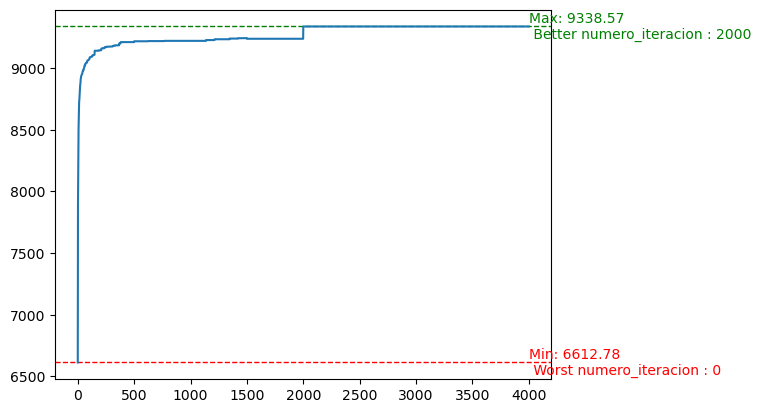

In [18]:
df_numero_iteracion = df_algorithm.groupby("numero_iteracion")["fitness"].mean().reset_index()

max_fitness = df_numero_iteracion["fitness"].max()
better_numero_iteracion = df_numero_iteracion[df_numero_iteracion["fitness"] == max_fitness]["numero_iteracion"].values[0]
min_fitness = df_numero_iteracion["fitness"].min()
worst_numero_iteracion = df_numero_iteracion[df_numero_iteracion["fitness"] == min_fitness]["numero_iteracion"].values[0]

plt.axhline(max_fitness, color='green', linestyle='--', linewidth=1)
plt.axhline(min_fitness, color='red', linestyle='--', linewidth=1)

plt.text(df_numero_iteracion["numero_iteracion"].iloc[-1], max_fitness, f'Max: {max_fitness:.2f} \n Better numero_iteracion : {better_numero_iteracion}', color='green', va='center')
plt.text(df_numero_iteracion["numero_iteracion"].iloc[-1], min_fitness, f'Min: {min_fitness:.2f} \n Worst numero_iteracion : {worst_numero_iteracion}', color='red', va='center')

plt.plot(df_numero_iteracion["numero_iteracion"] , df_numero_iteracion["fitness"] )

# <p  style="text-align:center;"> **Fitness by wAttr** </p>

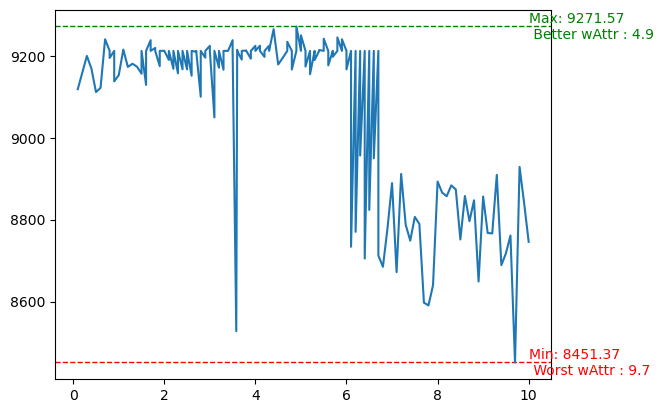

In [19]:
df_wAttr = df_algorithm.groupby("wAttr")["fitness"].mean().reset_index()

max_fitness = df_wAttr["fitness"].max()
better_wAttr = df_wAttr[df_wAttr["fitness"] == max_fitness]["wAttr"].values[0]
min_fitness = df_wAttr["fitness"].min()
worst_wAttr = df_wAttr[df_wAttr["fitness"] == min_fitness]["wAttr"].values[0]

plt.axhline(max_fitness, color='green', linestyle='--', linewidth=1)
plt.axhline(min_fitness, color='red', linestyle='--', linewidth=1)

plt.text(df_wAttr["wAttr"].iloc[-1], max_fitness, f'Max: {max_fitness:.2f} \n Better wAttr : {better_wAttr}', color='green', va='center')
plt.text(df_wAttr["wAttr"].iloc[-1], min_fitness, f'Min: {min_fitness:.2f} \n Worst wAttr : {worst_wAttr}', color='red', va='center')

plt.plot(df_wAttr["wAttr"] , df_wAttr["fitness"] )

# <p  style="text-align:center;"> **Fitness by nado** </p>

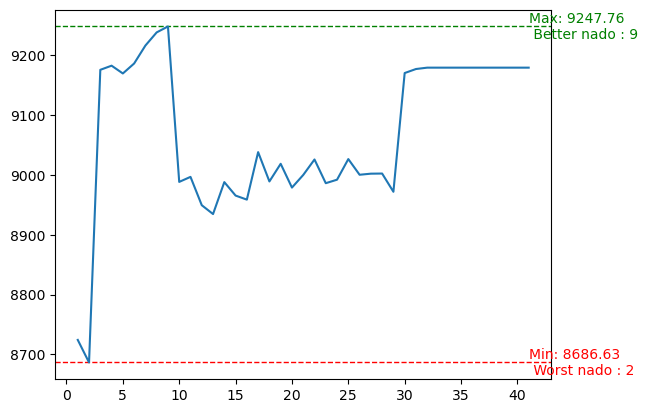

In [20]:
df_nado = df_algorithm.groupby("nado")["fitness"].mean().reset_index()

max_fitness = df_nado["fitness"].max()
better_nado = df_nado[df_nado["fitness"] == max_fitness]["nado"].values[0]
min_fitness = df_nado["fitness"].min()
worst_nado = df_nado[df_nado["fitness"] == min_fitness]["nado"].values[0]

plt.axhline(max_fitness, color='green', linestyle='--', linewidth=1)
plt.axhline(min_fitness, color='red', linestyle='--', linewidth=1)

plt.text(df_nado["nado"].iloc[-1], max_fitness, f'Max: {max_fitness:.2f} \n Better nado : {better_nado}', color='green', va='center')
plt.text(df_nado["nado"].iloc[-1], min_fitness, f'Min: {min_fitness:.2f} \n Worst nado : {worst_nado}', color='red', va='center')

plt.plot(df_nado["nado"] , df_nado["fitness"] )

# <p  style="text-align:center;"> **BETTER BY FITNESS** </p>

In [27]:
print(f"Mejor dAttr : {better_dAttr} \nMejor interaccion : {better_interaccion} \nMejor nado : {better_nado} \nMejor numero iteracion : {better_numero_iteracion} \n"
      f"Mejor numero random bacterias : {better_numero_random_bacterias} \nMejor tumbo : {better_tumbo} \nMejor wAttr : {better_wAttr} \nMejor wRep : {better_wRep}")

Mejor dAttr : 5.5 
Mejor interaccion : 1.7 
Mejor nado : 9 
Mejor numero iteracion : 2000 
Mejor numero random bacterias : 6 
Mejor tumbo : 2 
Mejor wAttr : 4.9 
Mejor wRep : 24
